In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

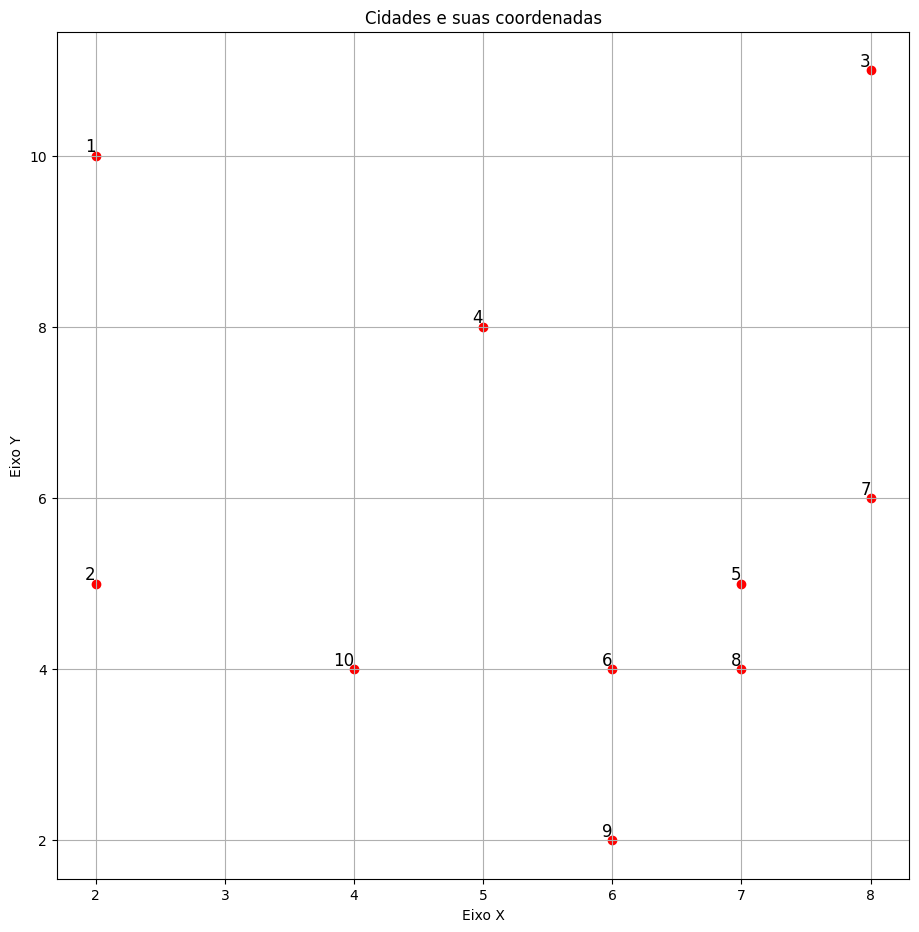

In [4]:
#plotar as cidades num plano 2d
cidades = {
	1: (2, 10),
	2: (2, 5),
	3: (8, 11),
	4: (5, 8),
	5: (7, 5),
	6: (6, 4),
	7: (8, 6),
	8: (7, 4),
	9: (6, 2),
	10: (4, 4)
}

coordenadas_x = [coordenada[0] for coordenada in cidades.values()]
coordenadas_y = [coordenada[1] for coordenada in cidades.values()]

#plottar as cidades
plt.figure(figsize=(11, 11))
plt.scatter(coordenadas_x, coordenadas_y, color='red', marker='o')

#anota as cidades com os numeros respectivos
for city, (x, y) in cidades.items():
	plt.text(x,y,str(city), fontsize=12, ha='right', va='bottom')

#adicionar labels e titulo
plt.title('Cidades e suas coordenadas')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
#mostrar o grafico
plt.show()



In [44]:

def plot_route(route, cities):
    # Create a figure and an axes.
    plt.figure(figsize=(10, 7))

    # Extract coordinates for the route
    x = [cities[city][0] for city in route]  # Accessing x-coordinate
    y = [cities[city][1] for city in route]  # Accessing y-coordinate

    # Add the first city again to close the loop
    x.append(cities[route[0]][0])
    y.append(cities[route[0]][1])

    # Plot lines connecting each city
    plt.plot(x, y, 'o-', label='Route')

    # Plot city numbers on the graph
    for city, coord in cities.items():
        plt.text(coord[0], coord[1], str(city), fontsize=12, ha='center', va='center')

    # Add titles and labels
    plt.title('Best Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

melhor rota encontrada: 1 7 6 8 5 9 3 10 4 2
score da melhor rota encontrada: 0.02934705899391271


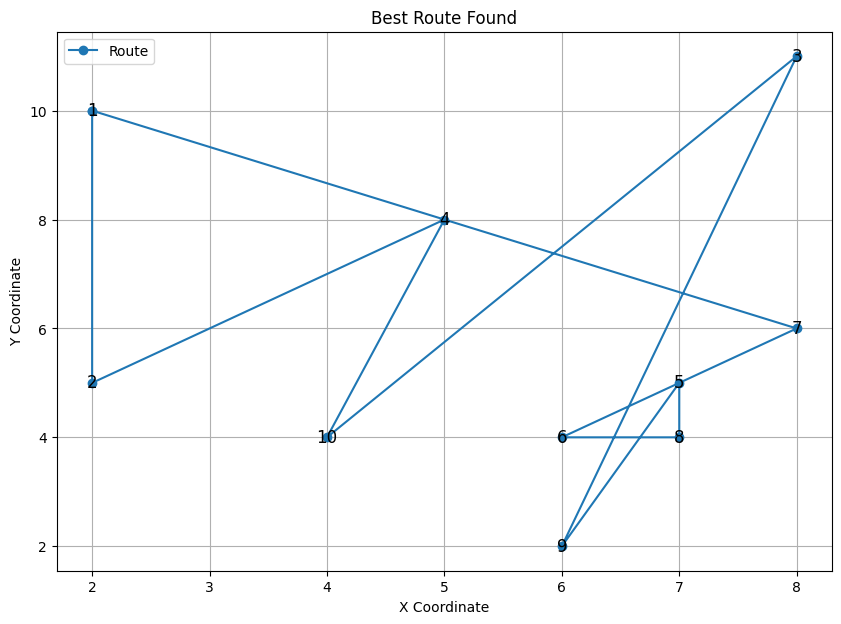

In [54]:

TAMANHO_POPULACAO = 30
NUMERO_DE_GERACOES = 50
TAXA_MUTACAO = 0.05

#funcao para calcular a distancia euclidiana entre duas cidades
def distancia(cidade1, cidade2):
	x1, y1 = cidade1
	x2, y2 = cidade2
	return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

#funcao para calcular a distancia total de uma rota
def distancia_total(rota):
	distancia_total = 0
	#itera por todas as cidades na rota, exceto a ultima
	for i in range(len(rota) - 1):
		distancia_total += distancia(cidades[rota[i]], cidades[rota[i+1]])
	#adiciona a distancia da ultima cidade da rota para a primeira cidade
	distancia_total += distancia(cidades[rota[-1]], cidades[rota[0]])
	return distancia_total

#funcao para gerar uma populacao inicial de rotas
def populacao_inicial(TAMANHO_POPULACAO, cidades):
	#gera uma lista de cidades em ordem aleatoria
	populacao = []
	for _ in range(TAMANHO_POPULACAO):
		rota = list(cidades.keys())
		#embaralha o array de cidades
		rota.remove(1)#remove a primeira cidade, pois ela eh a cidade de partida
		random.shuffle(rota)
		rota.insert(0,1)#insere a cidade de partida no inicio da rota
		populacao.append(rota)

	return populacao

#funcao para calcular o fitness de uma rota
def fitness(rota):
	#calcula a distancia total da rota
	distancia_calculada = distancia_total(rota)
	#quanto maior a rota(distancia), pior o fitness, entao vamos dividir 1 pela distancia calculada
	return 1 / distancia_calculada

#selecao por torneio, sao selecionados aleatoriamente 3 individuos da populacao e o individuo
#com o maior fitness eh selecionado
def selecao_torneio(populacao, scores, k=3):
	#seleciona k individuos aleatoriamente

	#para evitar repeticoes, é criado um conjunto para armazenar indices ja selecionados anteriormente:
	indices_selecionados = set()
	while len(indices_selecionados) < k:
		indice = random.randint(0, len(populacao) -1)
		indices_selecionados.add(indice)

	selecionados = [(populacao[i],scores[i]) for i in indices_selecionados]#(i in...) feito para iterar sobre os valores dos indices selecionados

	#compara os 3 elementos do selecionados, selecionado o valor maximo do segundo elemento da tupla selecionados(scores)
	#o elemento da tupla de maior score é selecionado e seu valor do index[0] é retornado (individuo da populacao, ou seja, uma rota)
	return max(selecionados, key=lambda x: x[1])[0]


#crossover de 2 pontos
#uma rota se parece da seguinte forma (1,2,3,4,5,6,7,8,9,10)
def crossover(pai1, pai2):
	tamanho = len(pai1)
	child1 = [None] * tamanho
	child2 = [None] * tamanho

	child1[0] = pai1[0]
	child2[0] = pai2[0]

	index1 = random.randint(1, len(pai1) -2)
	index2= random.randint(index1 + 1, len(pai1) - 1)

	child1[index1:index2] = pai1[index1:index2]
	child2[index1:index2] = pai2[index1:index2]

	fill_child(child1,pai2,index2,tamanho)
	fill_child(child2,pai1,index2,tamanho)

	return child1,child2

def fill_child(child, parent, start, tamanho):
    current_pos = start if start != 0 else 1  # se o start for 0, o current_pos sera 1
    parent_pos = start if start != 0 else 1  # se o start for 0, o parent_pos sera 1

    while None in child[1:]:  # itera enquanto houver None na lista child (ignorando a primeira posicao, pois ela ja foi preenchida)
        gene = parent[parent_pos % tamanho]  # Use modulo to wrap around

        if gene not in child and gene != child[0]:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % tamanho  # Increment and wrap around safely

            if current_pos == 0:
                current_pos = 1

        parent_pos = (parent_pos + 1) % tamanho  # Increment and wrap around safely


#swap mutation, dois indices sao escolhidos aleatoriamente e os itens correspondentes sao trocados entre si
def mutacao(individuo):
    if random.random() < TAXA_MUTACAO:
        index1 = random.randint(1, len(individuo) - 1)  # Começa de 1 para evitar alterar a primeira cidade
        index2 = random.randint(1, len(individuo) - 1)
        while index1 == index2:  # Garante que index1 e index2 sejam diferentes
            index2 = random.randint(1, len(individuo) - 1)
        individuo[index1], individuo[index2] = individuo[index2], individuo[index1]
    return individuo

#crio as cidades no plano 2d
cidades = {
	1: (2, 10),
	2: (2, 5),
	3: (8, 11),
	4: (5, 8),
	5: (7, 5),
	6: (6, 4),
	7: (8, 6),
	8: (7, 4),
	9: (6, 2),
	10: (4, 4)
}

#construcao do algoritmo genetico se da por: gerar uma populacao incial, avalio ela,
def algoritmo_genetico():
	populacao = populacao_inicial(TAMANHO_POPULACAO, cidades)
	scores = []
	#A CADA geraca
	for geracao in range(NUMERO_DE_GERACOES):
		nova_populacao = []
		for individuo in populacao:
			score = fitness(individuo)
			scores.append(score)

		#depois de avaliar a populacao, seleciona para cruzamento e mutacao os melhores individuos
		while len(nova_populacao) < TAMANHO_POPULACAO:
			selecionado1 = selecao_torneio(populacao, scores, 3)
			selecionado2 = selecao_torneio(populacao, scores, 3)
			child1, child2 = crossover(selecionado1, selecionado2)
			nova_populacao.append(mutacao(child1))
			nova_populacao.append(mutacao(child2))

		populacao = nova_populacao

	populacao_classificada = list(zip(populacao, scores))
	melhor_individuo = max(populacao_classificada, key=lambda x: x[1])

	return melhor_individuo

melhor_rota = algoritmo_genetico()
print('melhor rota encontrada: ' + ' '.join(str(x) for x in melhor_rota[0]))
print('score da melhor rota encontrada: ' + str(melhor_rota[1]))

plot_route(melhor_rota[0], cidades)







